In [1]:
# #!pip install kagglehub
# import kagglehub
# import shutil
# import os

# # Download latest version
# path = kagglehub.dataset_download('mirichoi0218/insurance')
# print('Path to dataset files:', path)

# target_path = '../data'
# os.makedirs(target_path, exist_ok=True)

# # Copy downloaded files to the target path
# for item in os.listdir(path):
#   s = os.path.join(path, item)
#   d = os.path.join(target_path, item)
#   if os.path.isdir(s):
#     shutil.copytree(s, d, dirs_exist_ok=True)
#   else:
#     shutil.copy2(s, d)

# print('Copied dataset to:', target_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
insurance_data = pd.read_csv('../data/insurance.csv')

# Create new column for age group
age_bins = range(0, 101, 10)  # from 0 to 100 in steps of 10
age_labels = [f"{i}-{i+10}" for i in age_bins[:-1]]
insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=age_bins, labels=age_labels, right=False)

# Create new column for BMI group
bmi_bins = [0, 18.5, 25, 30, 35, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese']
insurance_data['bmi_group'] = pd.cut(insurance_data['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Create new column for charge group
charge_bins = list(range(0, 80000, 5000))
charge_labels = [f'{charge_bins[i]}-{charge_bins[i+1]}' for i in range(len(charge_bins) - 1)]
insurance_data['charges_group'] = pd.cut(insurance_data['charges'], bins=charge_bins, labels=charge_labels, right=False)


# Create new column for children group
child_bins = list(range(0, 10, 1))  # [0, 1, 2, ..., 9]
child_labels = [f'{child_bins[i]}' for i in range(len(child_bins) - 1)]
insurance_data['child_group'] = pd.cut(insurance_data['children'], bins=child_bins, labels=child_labels, right=False)

In [4]:
print('Dataset size:', insurance_data.shape)

print('\nData types for all columns:')
print(insurance_data.dtypes)

insurance_data.head()

Dataset size: (1338, 11)

Data types for all columns:
age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
charges           float64
age_group        category
bmi_group        category
charges_group    category
child_group      category
dtype: object


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,charges_group,child_group
0,19,female,27.900,0,yes,southwest,16884.92400,10-20,Overweight,15000-20000,0
1,18,male,33.770,1,no,southeast,1725.55230,10-20,Obese,0-5000,1
2,28,male,33.000,3,no,southeast,4449.46200,20-30,Obese,0-5000,3
3,33,male,22.705,0,no,northwest,21984.47061,30-40,Normal,20000-25000,0
4,32,male,28.880,0,no,northwest,3866.85520,30-40,Overweight,0-5000,0


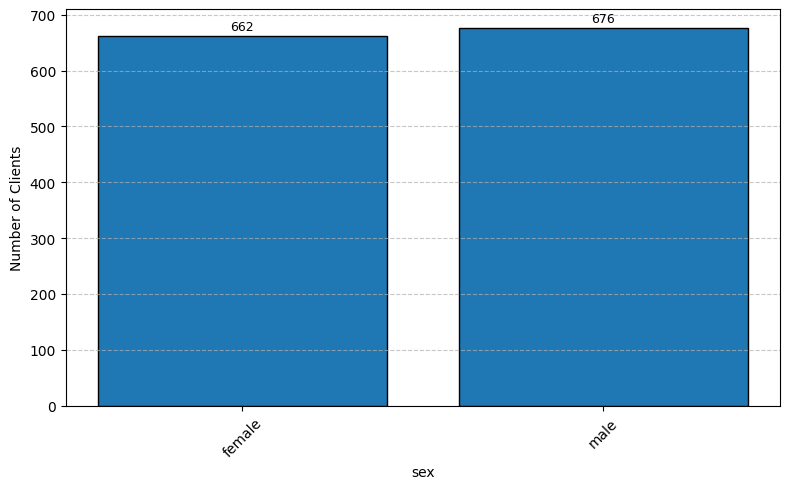

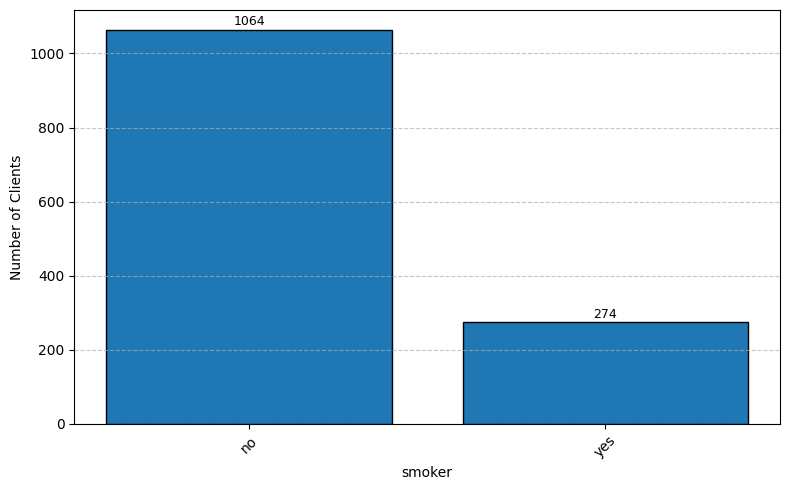

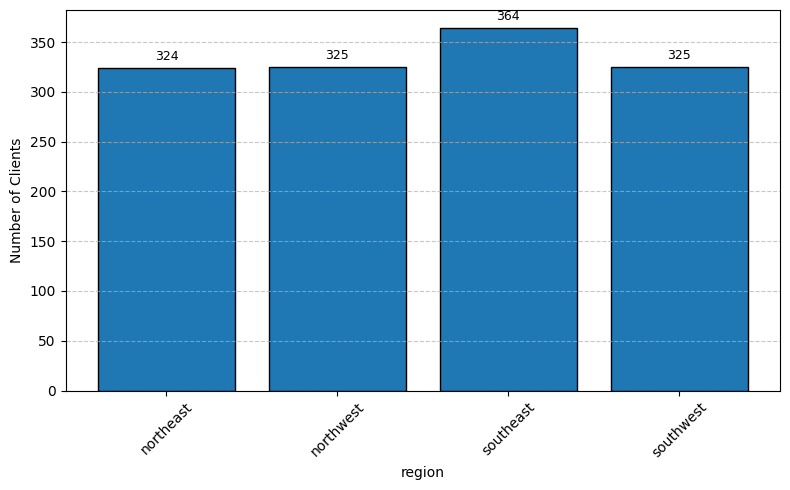

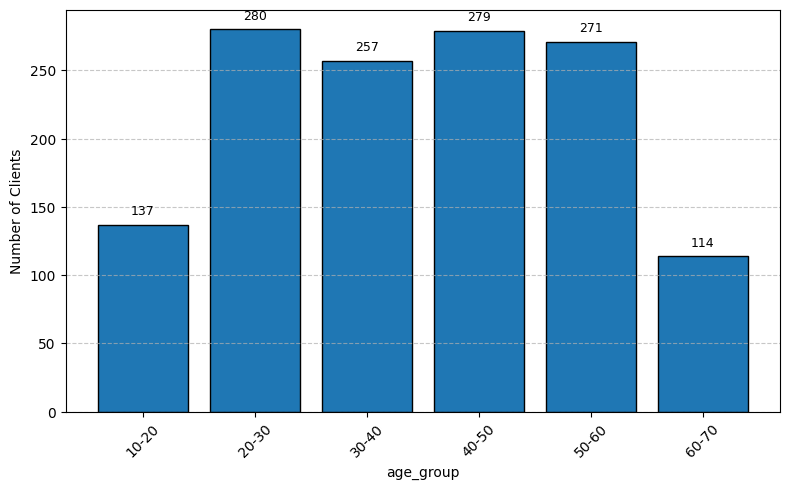

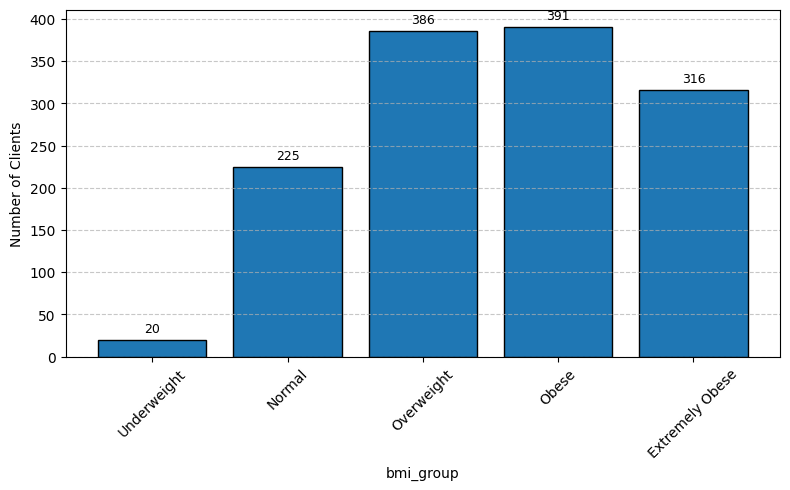

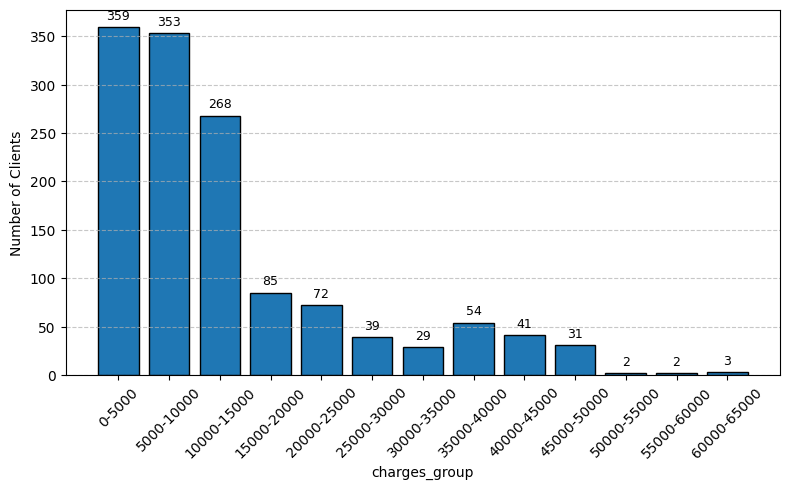

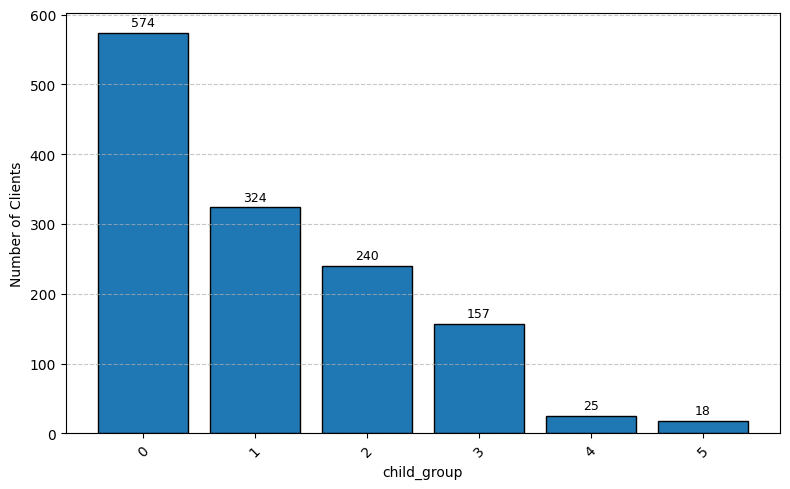

In [6]:
def plot_category_data(df, col_name):
  plt.figure(figsize=(8, 5))
  counts = df[col_name].value_counts().sort_index()
  counts = counts[counts > 0]
  
  plt.bar(counts.index.astype(str), counts.values, edgecolor='black')
  plt.xlabel(col_name)
  plt.ylabel('Number of Clients')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)

  # Add value labels on top of each bar
  for i, val in enumerate(counts.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9)

  plt.tight_layout()
  plt.show()

categorical_cols = list(insurance_data.select_dtypes(include=['object', 'category']).columns)
for col in categorical_cols:
  plot_category_data(insurance_data, col)